### 🏥 Patient Satisfaction in Healthcare – Exploratory Analysis

This project explores a dataset on patient satisfaction across different areas of hospital experience, such as appointment scheduling, waiting time, and treatment quality.  
The main objective is to identify patterns that explain why patients report being **unsatisfied**, **neutral**, or **satisfied** with their hospital visit.

Understanding these patterns can help healthcare providers improve their services and enhance patient experience.

---
#### 🔍 Key questions:

- What is the overall distribution of patient satisfaction levels?  
- Which hospital service aspects are most correlated with satisfaction or dissatisfaction?  
- Can we identify key drivers behind high or low satisfaction scores?

---

The insights obtained here will lay the groundwork for further analysis using **Natural Language Processing (NLP)** techniques on patient reviews and for predictive modeling to estimate satisfaction based on structurd hospital data.


### 1. Data Loading and Cleaning

In [97]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for NLP and ML models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Set style for plots
sns.set(style='whitegrid')

In [99]:
# Dataset path
patients_path = r"C:\Users\luisi\Documents\Projects\patient-sentiment-healthcare\data\dataset_patient_satisfaction.csv"

# Load dataset
patients_df = pd.read_csv(patients_path)

# Show dataset shape
print("Patients dataset shape:", patients_df.shape)

Patients dataset shape: (453, 17)


In [101]:
# Initial Exploration
print("Patients satisfaction data info:")
print(patients_df.info())

print("\nFirst rows of the dataset::")
print(patients_df.head())

print("\nStatistical description::")
print(patients_df.describe())

Patients satisfaction data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   satisfaction in RM              452 non-null    float64
 1   Check up appointment            452 non-null    float64
 2   Time waiting                    452 non-null    float64
 3   Admin procedures                452 non-null    float64
 4   Hygiene and cleaning            452 non-null    float64
 5   Time of appointment             452 non-null    float64
 6   Quality/experience dr.          452 non-null    float64
 7   Specialists avaliable           452 non-null    float64
 8   Communication with dr           452 non-null    float64
 9   Exact diagnosis                 452 non-null    float64
 10  Modern equipment                452 non-null    float64
 11  friendly health care workers    452 non-null    float64
 12  lab

### 2. Data Cleaning and Preprocessing

In [104]:
# Check missing values
print(patients_df.isnull().sum())

# Analyze min and max to ensure everything is within the range 1-3 or 1-5
num_cols = patients_df.columns

for col in num_cols:
    print(f"{col}: min = {patients_df[col].min()}, max = {patients_df[col].max()}")

satisfaction in RM                1
Check up appointment              1
Time waiting                      1
Admin procedures                  1
Hygiene and cleaning              1
Time of appointment               1
Quality/experience dr.            1
Specialists avaliable             1
Communication with dr             1
Exact diagnosis                   1
Modern equipment                  1
friendly health care workers      1
lab services                      1
avaliablity of drugs              1
waiting rooms                     1
hospital rooms quality            1
parking, playing rooms, caffes    1
dtype: int64
satisfaction in RM: min = 1.0, max = 3.0
Check up appointment: min = 1.0, max = 5.0
Time waiting: min = 1.0, max = 5.0
Admin procedures: min = 1.0, max = 5.0
Hygiene and cleaning: min = 1.0, max = 5.0
Time of appointment: min = 1.0, max = 5.0
Quality/experience dr.: min = 1.0, max = 5.0
Specialists avaliable: min = 1.0, max = 5.0
Communication with dr: min = 1.0, max = 5.0

In [106]:
patients_df.dropna(subset=['satisfaction in RM', 'Check up appointment', 'Time waiting',
       'Admin procedures', 'Hygiene and cleaning', 'Time of appointment',
       'Quality/experience dr.', 'Specialists avaliable',
       'Communication with dr', 'Exact diagnosis', 'Modern equipment',
       'friendly health care workers', 'lab services', 'avaliablity of drugs',
       'waiting rooms', 'hospital rooms quality',
       'parking, playing rooms, caffes'], inplace=True)
print(f"Remaining rows after removing null values: {len(patients_df)}")

Remaining rows after removing null values: 452


In [108]:
# Standardizing column names
patients_df.columns = patients_df.columns.str.lower() \
    .str.replace(r'[.,]', '', regex=True) \
    .str.replace(' ', '_')

In [110]:
print(patients_df.columns)

Index(['satisfaction_in_rm', 'check_up_appointment', 'time_waiting',
       'admin_procedures', 'hygiene_and_cleaning', 'time_of_appointment',
       'quality/experience_dr', 'specialists_avaliable',
       'communication_with_dr', 'exact_diagnosis', 'modern_equipment',
       'friendly_health_care_workers', 'lab_services', 'avaliablity_of_drugs',
       'waiting_rooms', 'hospital_rooms_quality',
       'parking_playing_rooms_caffes'],
      dtype='object')


In [143]:
# Mapping

dic_patient_satisfaction = {1: 'Satisfied', 2: 'Unsatisfied', 3: 'Neutral'}
label_independents_var = {1: 'Satisfied', 2: 'Unsatisfied', 3: 'Neutral', 4: 'Very Satisfied', 5: 'Very Unsatisfied'}

cols_to_map = ['check_up_appointment', 
            'time_waiting',
            'admin_procedures', 
            'hygiene_and_cleaning', 
            'time_of_appointment',
            'quality/experience_dr', 
            'specialists_avaliable',
            'communication_with_dr', 
            'exact_diagnosis', 'modern_equipment',
            'friendly_health_care_workers', 
            'lab_services', 
            'avaliablity_of_drugs',
            'waiting_rooms', 
            'hospital_rooms_quality',
            'parking_playing_rooms_caffes']

# Map the dependent variable
patients_df['patient_satisfaction_desc'] = patients_df['satisfaction_in_rm'].map(dic_patient_satisfaction)

# Map the independent varibale, creating new columns with the '_desc' suffix
for col in cols_to_map:
    patients_df[col + '_desc'] = patients_df[col].map(label_independents_var)

# Check the mapping
print(patients_df[['satisfaction_in_rm', 'patient_satisfaction_desc']].head())
print(patients_df[['avaliablity_of_drugs', 'avaliablity_of_drugs_desc']].head())

   satisfaction_in_rm patient_satisfaction_desc
0                 1.0                 Satisfied
1                 2.0               Unsatisfied
2                 2.0               Unsatisfied
3                 2.0               Unsatisfied
4                 3.0                   Neutral
   avaliablity_of_drugs avaliablity_of_drugs_desc
0                   1.0                 Satisfied
1                   1.0                 Satisfied
2                   1.0                 Satisfied
3                   5.0          Very Unsatisfied
4                   5.0          Very Unsatisfied


### Conlusion - Data Cleaning & Preprocessing

Before starting the analysis, we applied basic preprocessing steps to ensure the dataset was clean and readable:

- **Removed missing values**: A small number of rows contained nulls across various satisfaction-related columns, and were dropped to preserve data consistency.
- **Standardized column names**: We removed dots (`.`), replaced spaces with underscores (`_`), and converted all names to lowercase to facilitate access and consistency in coding.
- **Mapped numerical ratings to descriptive labels** for easier interpretation:
  - The target variable `satisfaction_in_rm` was mapped as:  
    `1 = Satisfied`, `2 = Unsatisfied`, `3 = Neutral`
  - All independent variables (1–5 scale) were mapped as:  
    `1 = Satisfied`, `2 = Unsatisfied`, `3 = Neutral`, `4 = Very Satisfied`, `5 = Very Unsatisfied`
- Created new columns with the `_desc` suffix for the mapped values of each variable.

These transformations improved readability and set the foundation for meaningful analysis and vsualization.
readability.
d hospital data.


### 3. EDA - Exploratory Analysis

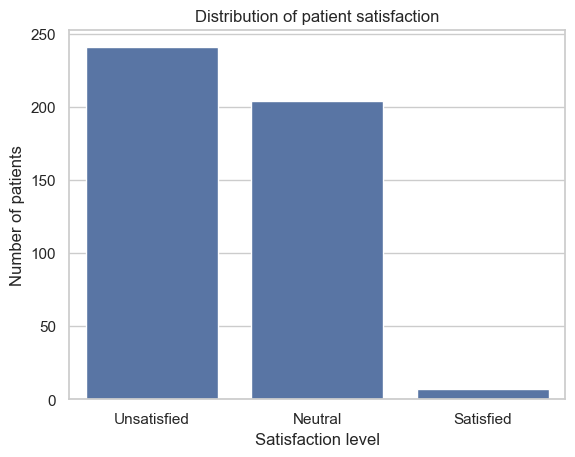

In [146]:
# Distribution of the target variable
sns.countplot(data=patients_df, x='patient_satisfaction_desc', order=patients_df['patient_satisfaction_desc'].value_counts().index)
plt.title('Distribution of patient satisfaction')
plt.xlabel('Satisfaction level')
plt.ylabel('Number of patients')
plt.show()

#### Observation:

The distribution of the target variable shows that the majority of patients reported being **Unsatisfied**, followed by those who felt **Neutral**, and only a small portion reported being **Satisfied**.  
This indicates a predominantly negative patient experience, suggesting that several areas of hospital service may require improvement.  
It will be crucial to identify which specific factors are most strongly associated with dissatisfaction.

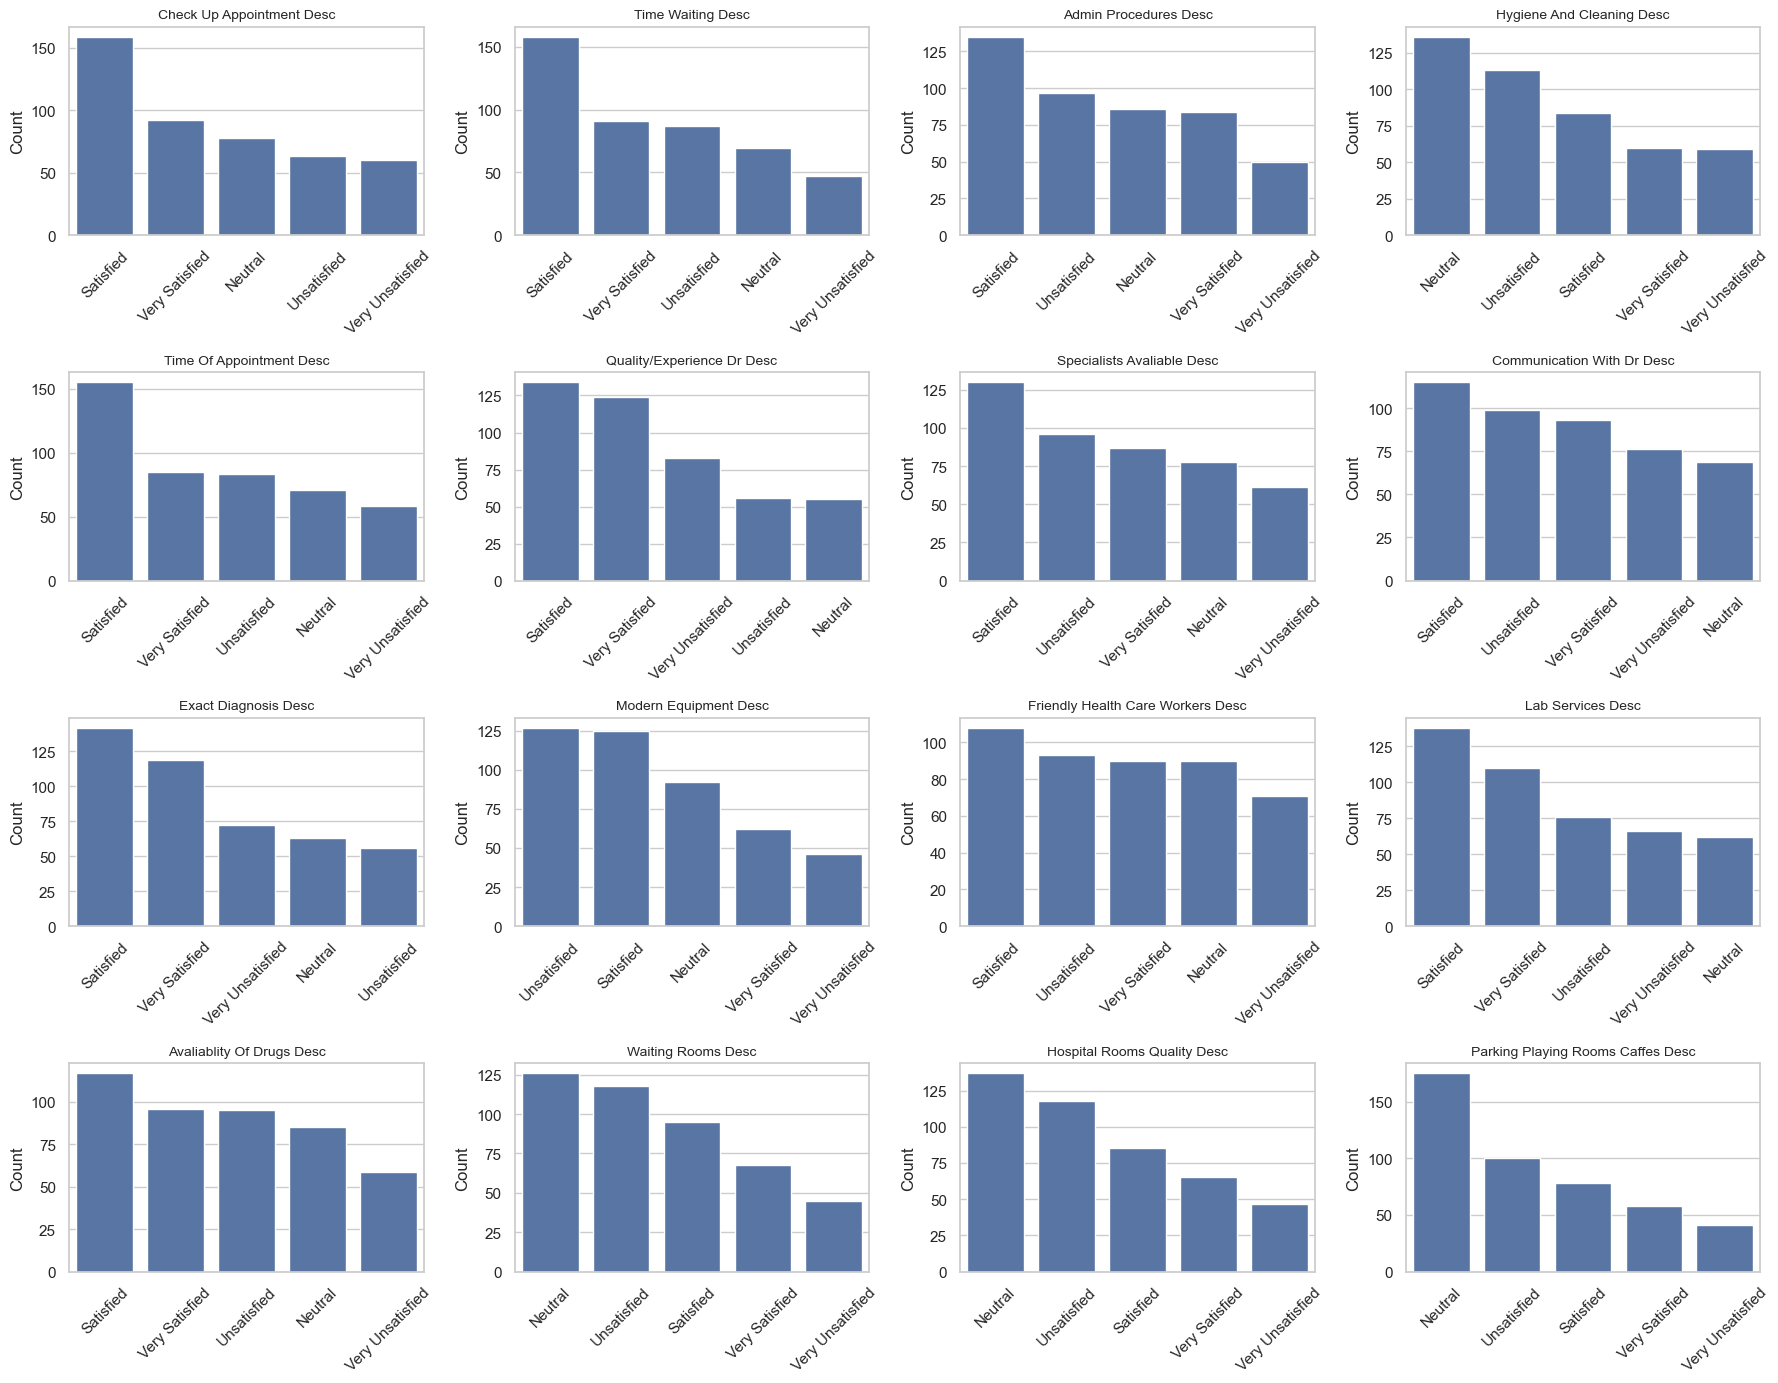

In [118]:
# Distribution of numerical variables (ratings of hospital aspects)
cols_desc = [col + '_desc' for col in cols_to_map]

# Distribution Plots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 14))
axes = axes.flatten()

for i, col in enumerate(cols_desc):
    sns.countplot(data=patients_df, x=col, ax=axes[i], order=patients_df[col].value_counts().index)
    axes[i].set_title(col.replace('_', ' ').title(), fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Observation:

Most hospital service variables show a high frequency of ratings labeled as **Satisfied (1)** or **Very Satisfied (4)**, with smaller but notable peaks in **Unsatisfied (2)** and **Very Unsatisfied (5)**.  
Some variables like `higiene_and_cleaning`, `waiting_rooms`, and `hospital_rooms_quality` appear more skewed toward dissatisfaction, which might explain the overall low satisfaction scores.

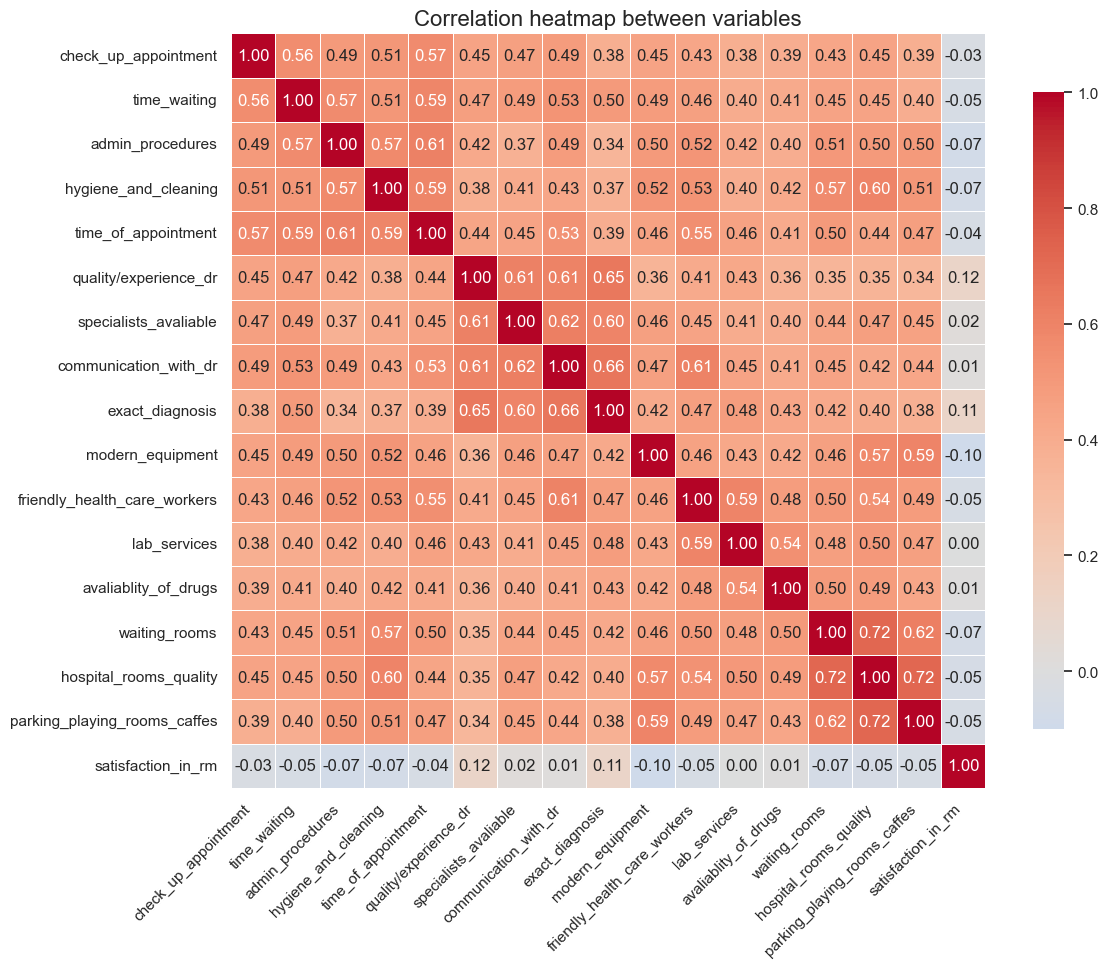

In [121]:
# Correlation heatmap between variables

cols_num = cols_to_map + ['satisfaction_in_rm']

corr = patients_df[cols_num].corr()

plt.figure(figsize=(12, 10))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation heatmap between variables', fontsize=16)
plt.tight_layout()
plt.show()

#### Observation:

The correlation heatmap reveals **low to moderate correlations** among variables.  
Interestingly, the target variable `satisfaction_in_rm` has only weak correlations with individual service variables (ranging from -0.05 to 0.12), which suggests that no single factor dominates patient perception, and multiple aspects may contribute jointly to dissatisfaction.

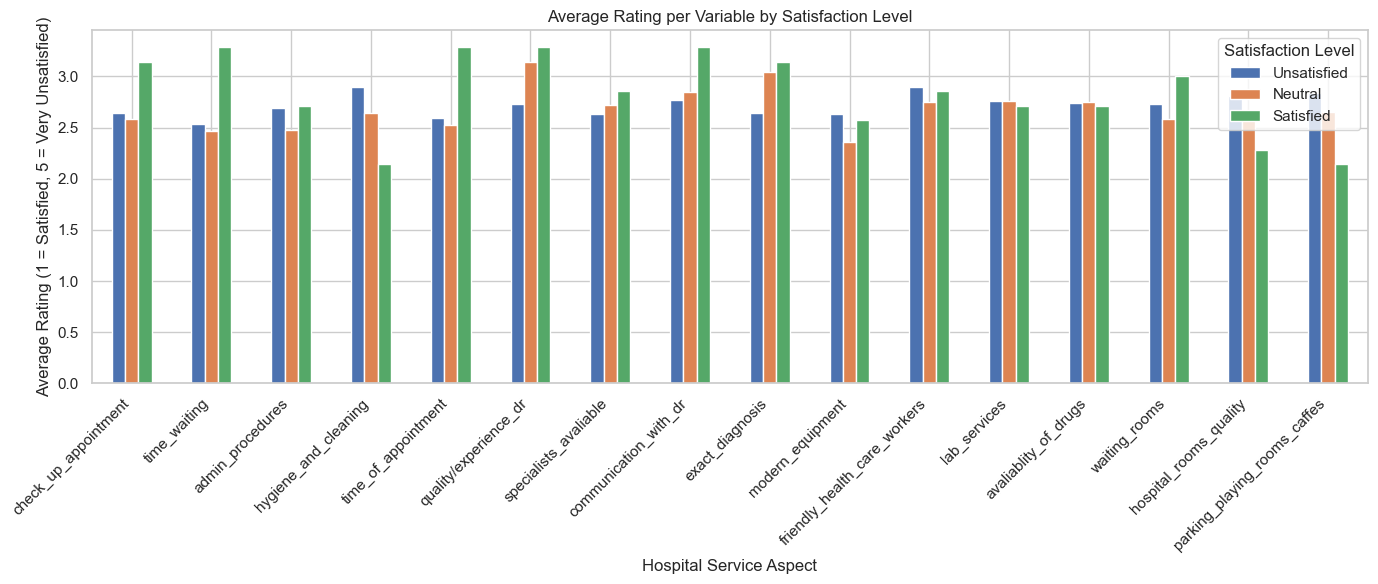

In [123]:
# Average rating per variable by satisfaction level

# Averages by satisfaction level
grouped_means = patients_df.groupby('patient_satisfaction_desc')[cols_to_map].mean().T

# Reorder columns
grouped_means = grouped_means[['Unsatisfied', 'Neutral', 'Satisfied']]

# Plot
grouped_means.plot(kind='bar', figsize=(14, 6))
plt.title('Average Rating per Variable by Satisfaction Level')
plt.xlabel('Hospital Service Aspect')
plt.ylabel('Average Rating (1 = Satisfied, 5 = Very Unsatisfied)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Satisfaction Level')
plt.tight_layout()
plt.show()

#### Observation:

This grouped bar chart compares the average score given to each hospital service variable across different patient satisfaction levels.

Patients who reported being **Unsatisfied** consistently gave **higher (worse) scores** in most categories — especially in aspects such as:

- `modern_equipment`
- `friendly_workers`
- `higyene_and_cleaning`
- `hospital_rooms_quality`
- `admin_procedures`
- `appointment_time`

These service areas appear to be **key drivers of dissatisfaction**.

Meanwhile, **Satisfied** patients tend to give lower (better) ratings across the board, with a clearer gap compared to Neutral and Unsatisfied groups.  
This visual evidence reinforces the idea that long wait times and poor administrative/hospital conditions are strong negative contributors to the overall patient experience.

### 4. Predictive modeling

In [152]:
# Features
X = patients_df[cols_to_map]

# Target
y = patients_df['satisfaction_in_rm']

In [154]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [128]:
# Model training

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [129]:
# Prediction and accuracy

y_pred = rf_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.66


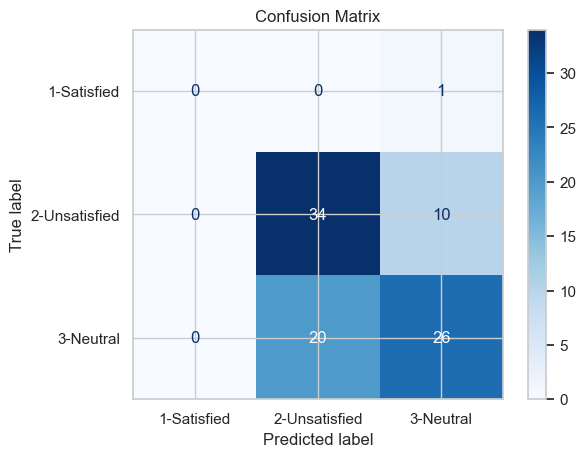

In [130]:
# Feature importance

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['1-Satisfied', '2-Unsatisfied', '3-Neutral']
)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#### Observations:

We trained a **Random Forest Classifier** to predict patient satisfaction (`satisfaction_in_rm`) based on hospital service ratings.

#### Why Random Forest?

We chose the **Random Forest Classifier** because it offers several advantages for this type of analysis:

- It handles **multiclass classification** (Satisfied, Neutral, Unsatisfied) naturally.
- It is **robust to noise and small datasets**, requiring minimal parameter tuning.
- It does **not require feature scaling or normalization**.
- It captures **non-linear relationships** between features and the target variable.
- It provides **feature importance** out of the box, helping to interpret which service aspects contribute most to patient satisfaction.

These properties make Random Forest a reliable and interpretable model for our goal of understanding and predicting patient satisfaction.

##### Accuracy
The model achieved an accuracy of approximately **66%** on the test set.  
This indicates that it performs reasonably well at predicting whether a patient is likely to be **Satisfied**, **Neutral**, or **Unsatisfied** based on their hospital experience.

##### Confusion Matrix
The confusion matrix helps us understand how well the model performs per class. We observe that:
- The model tends to predict **Unsatisfied** more accurately (likely because it's the majority class).
- It struggles slightly with **Neutral** and **Satisfied**, which have fewer samples and may overlap in ratings.

##### Feature Importance
According to the feature importance chart, the most influential factors in predicting satisfaction are:
- `waiting_rooms`
- `appointment_time`
- `hospital_rooms_quality`
- `communication_with_dr`

These results are consistent with earlier visual insights, reinforcing the importance of these service areas in shaping patient satisfaction.

---

The model is a good starting point and could be further improved with hyperparameter tuning or using techniques to address class imbalance.

### Final Conclusions and Recommendations

Based on the analysis of patient satisfaction survey data, we found several key insights:

#### Key Findings:
- The majority of patients reported being **Unsatisfied**, with very few selecting **Satisfied**.
- Variables such as `waiting_rooms`, `appointment_time`, `hospital_rooms_quality`, and `communication_with_dr` showed the **strongest association with dissatisfaction**, both visually and through predictive modeling.
- A Random Forest model achieved **66% accuracy** in predicting satisfaction levels using service-related features.
- Feature importance analysis confirmed that long wait times and poor facility conditions are key drivers of negative patient experience.

#### Recommendations:
- **Improve infrastructure and waiting conditions**, especially in hospital rooms and waiting areas.
- **Reduce administrative and appointment delays** to enhance perceived efficiency.
- **Focus on doctor-patient communication**, as it plays a strong role in shaping satisfaction.

#### Next Steps:
- Combine this structured survey analysis with **text analysis of open-ended patient reviews** using NLP and LLMs.
- Test additional models and apply techniques to address **class imbalance** for improved prediction accuracy.
- Explore clustering to identify patient segments with similar satisfaction patterns.

---

This project demonstrates how structured data and machine learning can help healthcare institutions understand patient experience and take data-driven action to improve care.
